In [2]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/processing_lib")

import functions as f
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from scipy.ndimage import  rotate

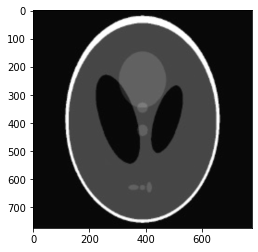

In [47]:
imgi = io.imread('Test3.png')[:,:,:3]
imgg = color.rgb2gray(imgi)
plt.imshow(imgg,cmap="gray")

In [74]:
def radon_trans(img):
    imgp = img#f.mirror_padding(img,100)
    a,b=np.array(imgp).shape
    size = [a if a>b else b][0]
    sino = np.zeros((180,size))
    for i in range(0,180):
        imgr = rotate(imgp,i,reshape=False)
        sino[i] = sum(np.array(imgr))
    return sino


def inv_radon_trans(img):
    
    for i in range(0,180):


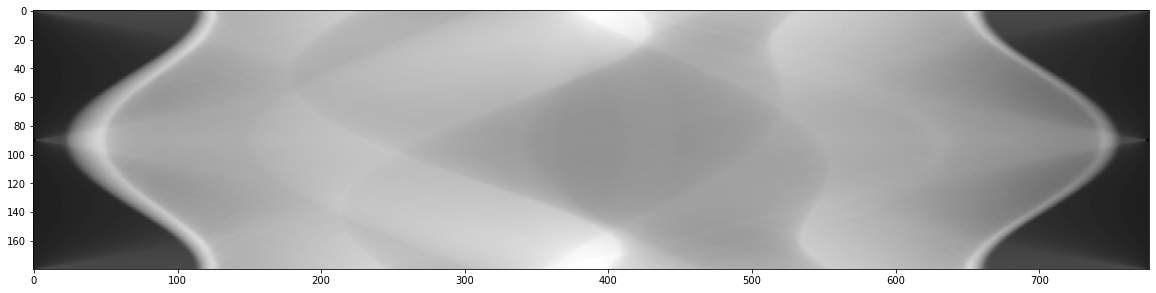

In [78]:
plt.figure(figsize = (20,15))
sinogramm = radon_trans(imgg)
plt.imshow(sinogramm,cmap = 'gray')